## Subfield Study

This notebook assigns each topic generated from the LDA and BERTopic approaches to a label from the Subfield Study included in the original CORD-19 Paper.

The subfields listed in the paper are as follows:
```
potential_topics_labels = [virology, immunology, surgery, internal medicine, intensive care medicine, molecular biology, pathology, genetics, other]
```

This gives us the opportunity to assign coarse grained topics to the articles. The approach taken in this notebook is outlined as follows:
*  Encode each Subfield Label using a Model design for semantic tasks.
*  Encode each topic list as a 'single sentence' to get an overall representation of each topic list.
*  Use Cosine Smilairty to compare each topic list to each subfiled label.
*  Assign each topic list to a subfiled label using argmax.

As word representations from LLms tend to be in a high-dimensional space, PCA will be used to reduce the dimensionality of this data for visualization.

The model `all-MiniLM-L6-v2` was chosen as it is designed to encode sentences for the purpose of semantic searching or clustering making it suitable for this task. [Documentation](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)


**Note**: A Hugging Face user access token is needed for this project. Go to [this](https://huggingface.co/docs/hub/security-tokens) website to set up a Hugging Face Account if needed.

In [3]:
# set seed for reproducibility
import random
random.seed(42)
#imports
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer # encode each label/sentence
from sklearn.metrics.pairwise import cosine_similarity #to compute similarity between label and list
from sklearn.decomposition import PCA #reduce dimensions for visualization

#Given Subfield Labels
potential_topics_labels = ["virology", "immunology", "surgery", "internal medicine", "intensive care medicine", "molecular biology", "pathology", "genetics", "other"]

#LDA and BERTopic Results in the form of one string per topic
topic_lists = [
    "student participant survey mental online anxiety education child self psychological",
    "vaccine vaccination antibody variant transmission influenza testing assay detection detect",
    "mask food air concentration surface energy water temperature material environmental",
    "policy article service community crisis economic global management paper world",
    "ci mortality p death trial child admission severity cohort covid",
    "protein drug immune target gene expression receptor mechanism induce therapeutic",
    "cancer surgery lung complication surgical pain procedure undergo diagnosis pulmonary",
    "propose network performance learning image application accuracy user predict tool",
    "teacher teaching learning learn student online education university educational learner",
    "child pediatric multisystem inflammatory pim syndrome infant adult fever ts",
    "replication glycan protein rna virus viral membrane glycosylation virion host",
    "image ray deep segmentation chest classification dataset convolutional ct learning",
    "government governance law policy country public global right political international",
    "protease docking compound inhibitor mpro drug molecular bind ligand pro",
    "vte thrombosis anticoagulation embolism venous coagulation thrombotic thromboembolism dimer heparin",
    "hospital hcw bed ambulance staff emergency healthcare preparedness care facility"
]


#Model to encode the labels and sentences
model = SentenceTransformer('all-MiniLM-L6-v2')

#encode the labels
label_embeddings = np.array([model.encode(label) for label in potential_topics_labels]) #arrays needed to compute cosine similarity

#encode the topic lists
topic_list_embeddings = np.array([model.encode(topic_list) for topic_list in topic_lists])

#assign to label based on cosine
label_subfield_assignments = []
cosine_scores = []


for topic_embedding in topic_list_embeddings:
    sim = cosine_similarity([topic_embedding], label_embeddings)[0]
    best_label_index = np.argmax(sim)
    label_subfield_assignments.append(potential_topics_labels[best_label_index])
    cosine_scores.append(sim[best_label_index])


#printing
for i, (topic, label, score) in enumerate(zip(topic_lists, label_subfield_assignments, cosine_scores)):
    print(f"Topic {i+1}: {topic}")
    print(f"Assigned Subfield Label: {label}")
    print(f"Cosine Similarity Score: {score}\n")


Topic 1: student participant survey mental online anxiety education child self psychological
Assigned Subfield Label: other
Cosine Similarity Score: 0.08621284365653992

Topic 2: vaccine vaccination antibody variant transmission influenza testing assay detection detect
Assigned Subfield Label: immunology
Cosine Similarity Score: 0.3748840391635895

Topic 3: mask food air concentration surface energy water temperature material environmental
Assigned Subfield Label: immunology
Cosine Similarity Score: 0.0674186423420906

Topic 4: policy article service community crisis economic global management paper world
Assigned Subfield Label: intensive care medicine
Cosine Similarity Score: 0.14221128821372986

Topic 5: ci mortality p death trial child admission severity cohort covid
Assigned Subfield Label: intensive care medicine
Cosine Similarity Score: 0.22941194474697113

Topic 6: protein drug immune target gene expression receptor mechanism induce therapeutic
Assigned Subfield Label: molecula

<ipython-input-6-97401f44a97a>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(embedding[0], embedding[1], c=label_to_color[label], label=label if label not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.6)


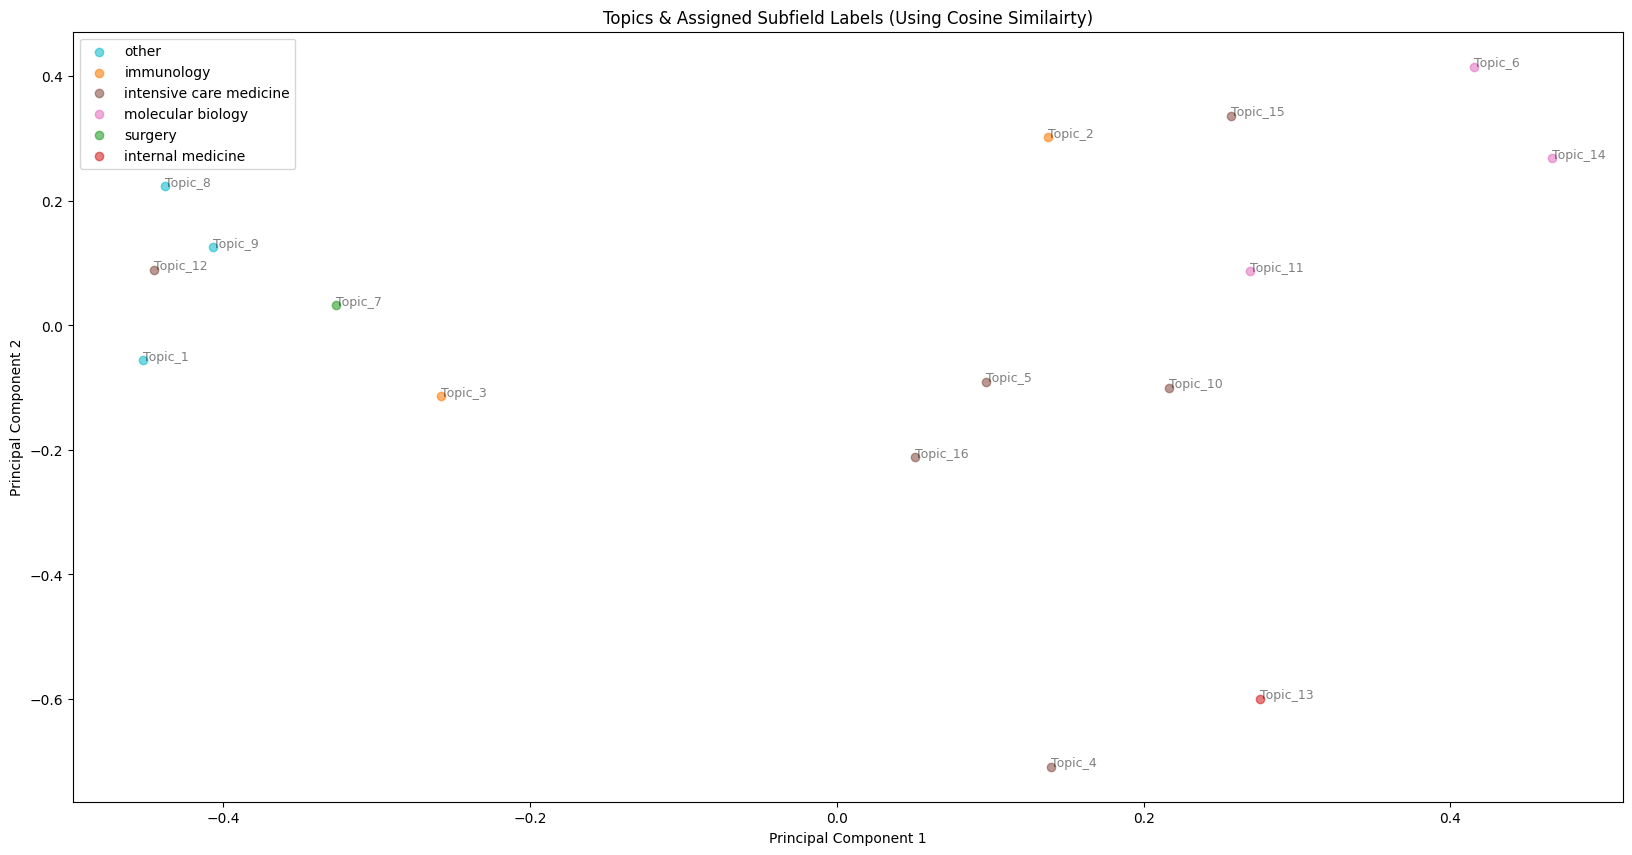

In [6]:
#Reducing Dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(topic_list_embeddings)

#plotting
plt.figure(figsize=(20, 10))
colours = plt.get_cmap("tab10", len(potential_topics_labels))
label_to_color = {label: colours(i) for i, label in enumerate(potential_topics_labels)}


#scatter plot with colour matching subfield
for i, (embedding, label) in enumerate(zip(reduced_embeddings, label_subfield_assignments)):
    plt.scatter(embedding[0], embedding[1], c=label_to_color[label], label=label if label not in plt.gca().get_legend_handles_labels()[1] else "", alpha=0.6)
    plt.text(embedding[0], embedding[1],f'Topic_{i+1}', fontsize=9, alpha=0.5)
plt.legend()
plt.title("Topics & Assigned Subfield Labels (Using Cosine Similairty)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



Upon visual inspection, it can be seen that most were assigned to 'intensive care medicine' and 'other' with varying performance.

For example:
*  Topic 11: 'replication glycan protein rna virus viral membrane glycosylation virion host' assigned to 'molecular biology' seems like a good fit.
*  Topic 13: 'government governance law policy country public global right political international' assigned to 'internal medicine' is not very useful.

This Subfiled Study is therefore only provided as an initial exploration, but will not be used for Topic Assignment which is explored further in the report.


# References

* Kirk Roberts, Tasmeer Alam, Steven Bedrick, Dina
 Demner-Fushman, Kyle Lo, Ian Soboroff, Ellen
 Voorhees, Lucy Lu Wang, and William R Hersh. 2020. **TREC-COVID: Rationale and Structure of an Information Retrieval Shared Task for COVID 19.** *Journal of the American Medical Informatics Association.



 * Lucy Lu Wang, Kyle Lo, Yoganand Chandrasekhar, Russell Reas, Jiangjiang Yang, Doug Burdick, Darrin Eide, Kathryn Funk, Yannis Katsis, Rodney Michael Kinney, Yunyao Li, Ziyang Liu, William Merrill, Paul Mooney, Dewey A. Murdick, Devvret Rishi, Jerry Sheehan, Zhihong Shen, Brandon Stilson, Alex D. Wade, Kuansan Wang, Nancy Xin Ru Wang, Christopher Wilhelm, Boya Xie, Douglas M. Raymond, Daniel S. Weld, Oren Etzioni, and Sebastian Kohlmeier. 2020. **CORD-19: The COVID-19 Open Research Dataset.** In *Proceedings of the 1st Workshop on NLP for COVID-19 at ACL 2020, Online. Association for Computational Linguistics.*